# Random Forest Model
Random forest model after normalizing the variable to house pricing from boston data set.

### Importing libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
%matplotlib inline
from scipy import stats
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error, accuracy_score


### Reading dataset

In [95]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [54]:
features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [96]:
features['MEDV'] = boston.target

### Summary Statistics

In [34]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualization

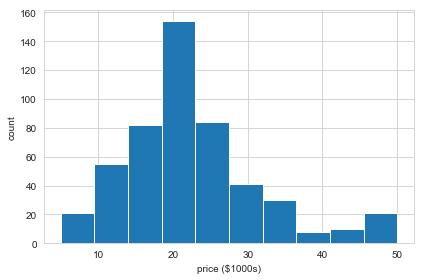

In [93]:
plt.figure(figsize=(6, 4))
plt.hist(targets)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

#### Observation:
    The distribution of target variable is normal.

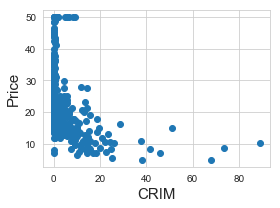

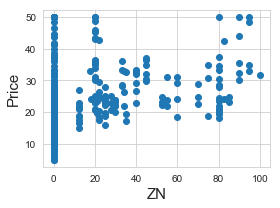

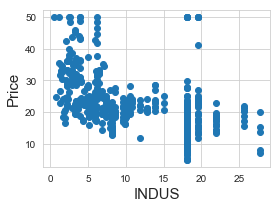

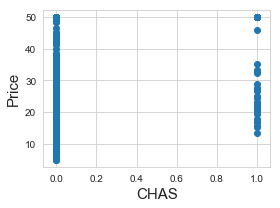

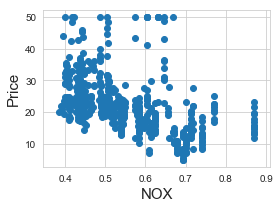

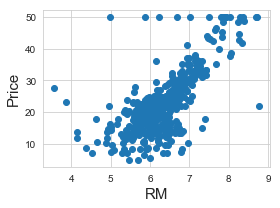

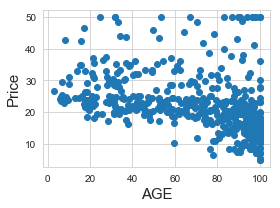

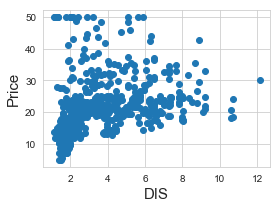

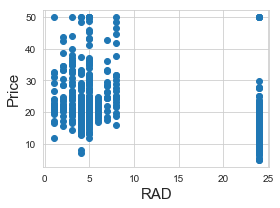

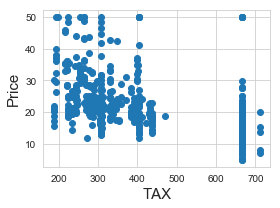

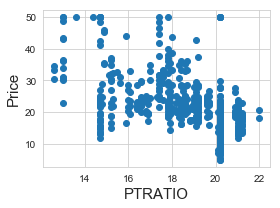

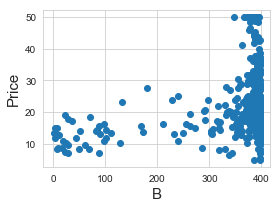

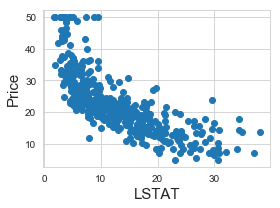

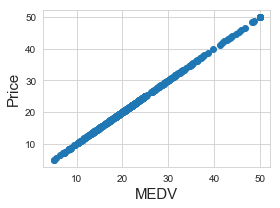

In [97]:
X = features.values
feature_names = features.columns
for index, feature_name in enumerate(features.columns):
    plt.figure(figsize=(4, 3))
    plt.scatter(X[:, index], targets)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

### Finding Missing Values:

In [9]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### Observation:
 There are no missing values in the dataset.
 

### Finding Outliers

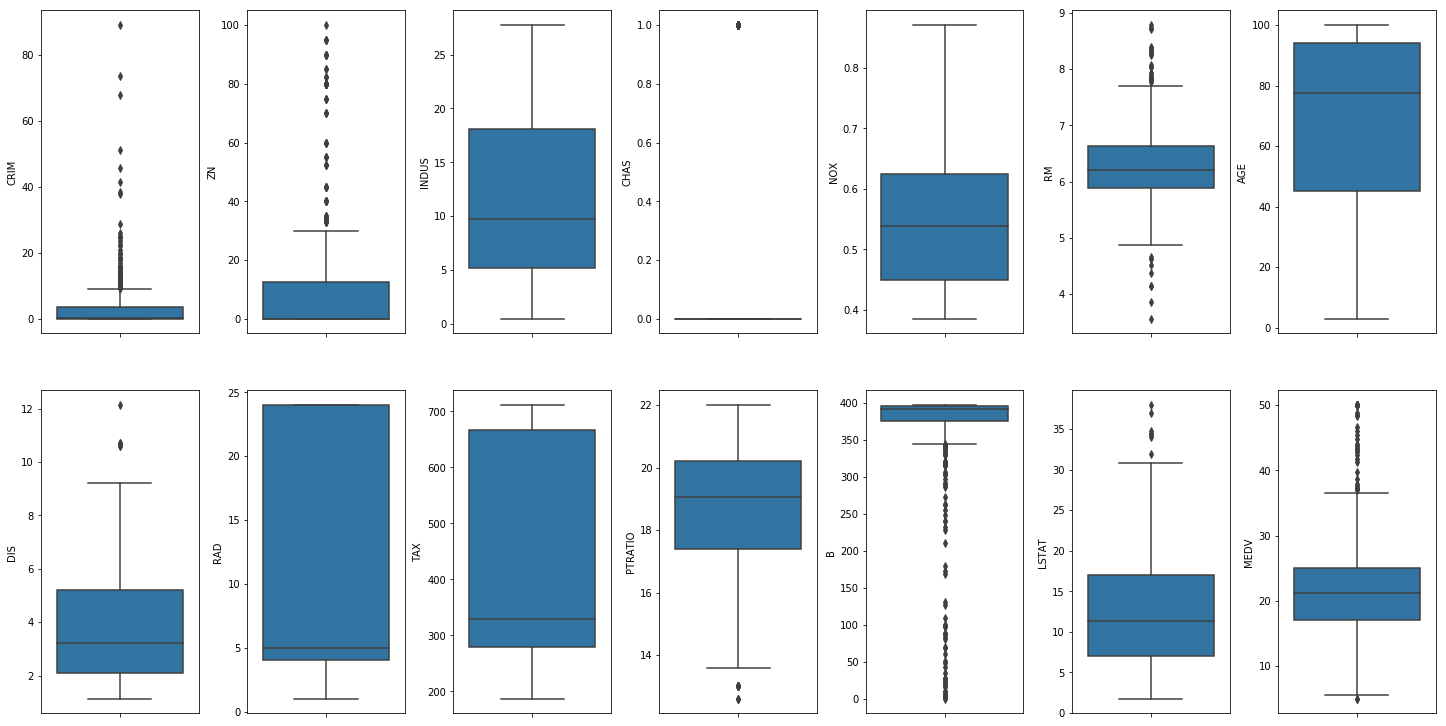

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in features.items():
    sns.boxplot(y=k, data=features, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [98]:
print(features.shape)
z = np.abs(stats.zscore(features))
print(z)
features= features[(z < 3).all(axis=1)]
print(features.shape)

(506, 14)
[[0.41771335 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41526932 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41527165 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41137448 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40568883 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41292893 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]
(415, 14)


### Feature selection

In [99]:
X = features.values
y = features['MEDV']

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",y_train.shape)
print("Y_test.shape : ",y_test.shape)

X_train Shape :  (332, 14)
X_test Shape :  (83, 14)
Y_train Shape :  (332,)
Y_test.shape :  (83,)


### Feature Scaling

In [102]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Random Forest Regressor Model

In [113]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), features.columns),reverse=True))

y_pred = rf.predict(X_test)
print("Error Rate of the Regression Model rf : ",mean_squared_error(y_pred,y_test))
print("R2 Score of the Regression Model rf : ",r2_score(y_pred,y_test))


Features sorted by their score:
[(0.9989, 'B'), (0.0003, 'INDUS'), (0.0003, 'CRIM'), (0.0002, 'AGE'), (0.0001, 'ZN'), (0.0001, 'TAX'), (0.0001, 'RM'), (0.0001, 'RAD'), (0.0, 'PTRATIO'), (0.0, 'NOX'), (0.0, 'DIS'), (0.0, 'CHAS')]
Error Rate of the Regression Model rf :  0.05462530120481923
R2 Score of the Regression Model rf :  0.9988344824352392


### Random Forest Regressor with Bagging

Bagging with all features

In [104]:
# Bagging: using all features
rfc1 = RandomForestRegressor(max_features=13, random_state=0)
rfc1.fit(X_train, y_train)
y_pred1 = rfc1.predict(X_test)
print("Error Rate of the Regression Model rfc1 : ",mean_squared_error(y_pred1,y_test))
print("R2 Score of the Regression Model rfc1 : ",r2_score(y_pred1,y_test))


Error Rate of the Regression Model rfc1 :  2.072830120481926
R2 Score of the Regression Model rfc1 :  0.9689533679066404


Bagging with max features = 8

In [105]:
rfc2 = RandomForestRegressor(max_features=8, random_state=0)
rfc2.fit(X_train, y_train)
y_pred2 = rfc2.predict(X_test)
print("Error Rate of the Regression Model rfc2 : ",mean_squared_error(y_pred2,y_test))
print("R2 Score of the Regression Model rfc2 : ",r2_score(y_pred2,y_test))

Error Rate of the Regression Model rfc2 :  2.3455542168674706
R2 Score of the Regression Model rfc2 :  0.9630406534397132


Bagging with n-estimators = 20

In [106]:
rfc3 = RandomForestRegressor(n_estimators=20,max_features=8, random_state=0)
rfc3.fit(X_train, y_train)
y_pred3 = rfc2.predict(X_test)
print("Error Rate of the Regression Model rfc3 : ",mean_squared_error(y_pred3,y_test))
print("R2 Score of the Regression Model rfc3 : ",r2_score(y_pred3,y_test))

Error Rate of the Regression Model rfc3 :  2.3455542168674706
R2 Score of the Regression Model rfc3 :  0.9630406534397132


Observation:
Error rate increases as number of features decreases

### Finding correlation between features

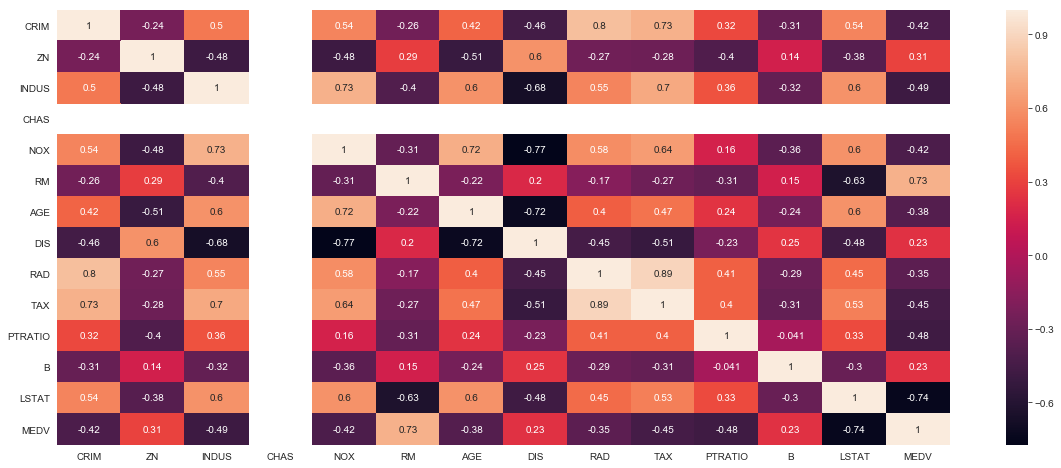

In [107]:
df_corr = features.corr()
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True)

In [108]:
# correlation matrix 
df_corr = features.corr().abs()

#select upper triangle of matrix
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))

#find all the features which have a correlation > 0.75 with other features.
corr_features = [ column for column in up_tri.columns if any(up_tri[column]> 0.75)]

#Print Correlated features
print(corr_features)

['DIS', 'RAD', 'TAX']


Dropping features with high correlation

In [109]:
X1 = features.drop(['DIS', 'TAX'],axis=1)#eliminating two and keeping one features
Y1 = features['MEDV']
X_train,X_test,Y_train,Y_test = train_test_split(X1,Y1,test_size =0.2,random_state=0)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (332, 12)
X_test Shape :  (83, 12)
Y_train Shape :  (332,)
Y_test.shape :  (83,)


#### Random Forest Regressor Model with dropped features

In [110]:
rfc_new = RandomForestRegressor()
rfc_new.fit(X_train, y_train)
y_pred_new = rfc_new.predict(X_test)
print("Error Rate of the Regression Model rfc3 : ",mean_squared_error(y_pred_new,y_test))
print("R2 Score of the Regression Model rfc3 : ",r2_score(y_pred_new,y_test))

Error Rate of the Regression Model rfc3 :  0.03406144578313254
R2 Score of the Regression Model rfc3 :  0.9992870187620407


#### Prediction for test data

In [111]:
Y_pred4 = rf4.predict(X_test)
print("Error Rate of the Regression Model rfc3 : ",mean_squared_error(Y_pred4,Y_test))
print("R2 Score of the Regression Model rfc3 : ",r2_score(Y_pred4,Y_test))

Error Rate of the Regression Model rfc3 :  0.6014493975903621
R2 Score of the Regression Model rfc3 :  0.9866411374306704


#### Regplot for predicted values

Text(0.5,1,'Prices vs Predicted prices')

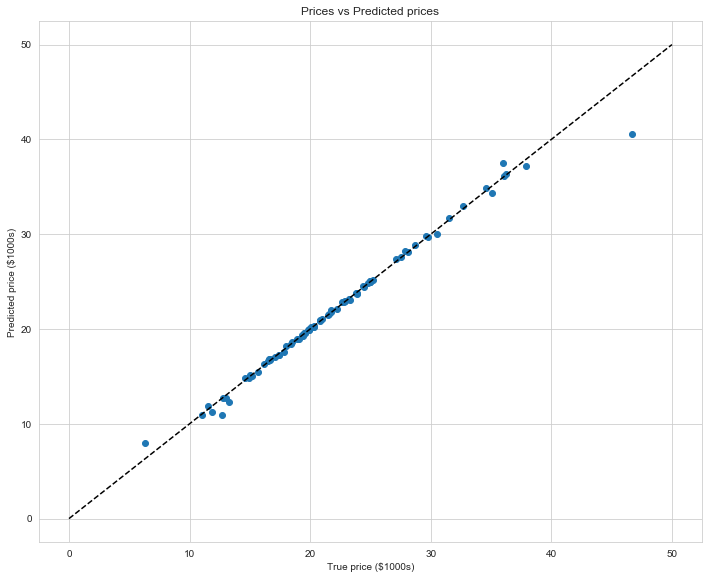

In [112]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred4)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")

## Conclusion:

1. Random Forest Regressor Model without bagging had accuracy of 99%.
2. Random Forest Regressor with Bagging (estimators-= 20, max-features=8) had accuracy of 96%.
3. Random Forest Regressor after dropping correlated features had accuracy of 98%.
